***

# *Predictive Maintenance Study*

This study is based on a Kaggle database on predictive maintenance made available to the general public (https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification). It's primary objectives are to build machine learning models able to make predictions about:

1. If a failure on the machine will occur during its operation, and;

2. If so, which kind of failure type is associated.

Kaggle's repository has the following remarks on this database:

Machine Predictive Maintenance Classification Dataset

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.

The dataset consists of 10 000 data points stored as rows with 14 features in columns
* UID: unique identifier ranging from 1 to 10000
* productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
* air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
* process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
* rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
* torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
* tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process. and a
* 'machine failure' label that indicates, whether the machine has failed in this particular data point for any of the following failure modes are true.

***

## Data And Module Importing - First Look - Renaming columns - Setting Theme

In [1]:
# Importing main modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating dataframe from source csv
data = pd.read_csv("predictive_maintenance.csv")

In [3]:
# Data info: columns, features, datatypes, counts, nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [4]:
# First data samples
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [5]:
# Summary statistics in a glance
data.describe(include = 'all')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
count,10000.00000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,10000,3,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,M14860,L,NaN,NaN,NaN,NaN,NaN,NaN,No Failure
freq,NaN,1,6000,NaN,NaN,NaN,NaN,NaN,NaN,9652
mean,5000.50000,NaN,NaN,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,NaN
std,2886.89568,NaN,NaN,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,NaN
min,1.00000,NaN,NaN,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,NaN
25%,2500.75000,NaN,NaN,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,NaN
50%,5000.50000,NaN,NaN,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,NaN
75%,7500.25000,NaN,NaN,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,NaN


In [6]:
# Renaming columns to facilitate understanding and coding

# Rename dictionary
old_labels = data.columns

new_labels = ['uid', 'prod_id', 'prod_type', 'air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear', 'target', 'failure_type']

data.columns = new_labels


In [7]:
# Setting color palette for plotting in advance
sns.set_theme(style = 'darkgrid', palette = 'icefire')

***

## Exploratory Data Analysis

Before choosing and implementing any machine learning algorithm for failure prediction, it's important to explore the data, differ categorical and numerical data, get to know some statistics (centrality, frequency, spread), as well as look for associations between variables since they point to a better, prior understanding, helping to select the features which may enrich the most the model we are trying to derive.

In [8]:
# Categorical variables classes
print(data.prod_type.unique())
print(data.failure_type.unique())

['M' 'L' 'H']
['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain Failure'
 'Random Failures' 'Heat Dissipation Failure']


In [9]:
# Product Type Categories and Counts
data.prod_type.value_counts()

L    6000
M    2997
H    1003
Name: prod_type, dtype: int64

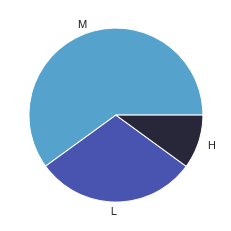

In [10]:
plt.pie(data.prod_type.value_counts(), labels = data.prod_type.unique())
plt.show()

In [11]:
# Binary Target Variable - Failure / No Failure
data.target.value_counts()

0    9661
1     339
Name: target, dtype: int64

In [12]:
data.target.value_counts() / len(data)

0    0.9661
1    0.0339
Name: target, dtype: float64

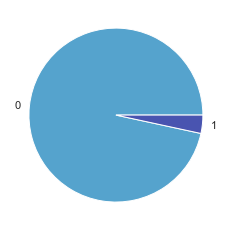

In [13]:
plt.pie(data.target.value_counts(), labels = data.target.unique())
plt.show()

In [14]:
# Failure Types Categories and Counts
data.failure_type.value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: failure_type, dtype: int64

C:\Users\rafab\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


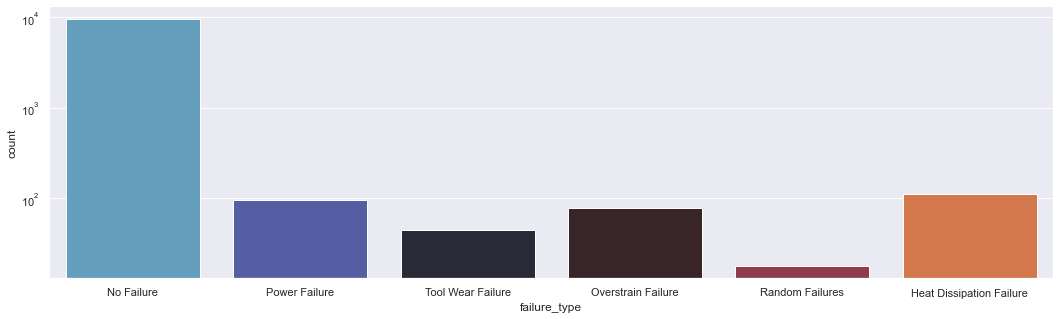

In [15]:
plt.figure(figsize = (18, 5))
sns.countplot(data.failure_type)
plt.yscale('log')
plt.show()

**Note:**
Target variable (Failure / No Failure is highly unbalanced!)

**Note:** The number of failed samples from the target column is 9 units higher than the failure type columns suggests! 

In [16]:
# Investigating the difference between No Failure labeled sample number in Target and in Type
failure_data = data[['target','failure_type']][data['target'] == 0]
failure_data.value_counts()

target  failure_type   
0       No Failure         9643
        Random Failures      18
dtype: int64

In [17]:
failure_data_type = data[['target','failure_type']][data['failure_type'] == 'No Failure']
failure_data_type.value_counts()

target  failure_type
0       No Failure      9643
1       No Failure         9
dtype: int64

**Note:**
We can see that 9 events were classified as No Failure but their targets labeled with 1. 
Also, 18 labels of failure type events were classified as Random Failures but got their target labels as 0 (No Failure). These samples will be removed from the dataframe.

In [18]:
# Correcting Data Inconsistencies
data = data.drop(data[((data.failure_type == 'Random Failures') & (data.target == 0)) | ((data.target == 1) & (data.failure_type == 'No Failure'))].index)

In [19]:
# Contingency table of proportions for categorical variables

# Product Type and Target (Failure)
contingency_target_type = pd.crosstab(data.prod_type, data.target)
contingency_target_type / len(data) * 100

target,0,1
prod_type,,
H,9.806477,0.200541
L,57.685752,2.316254
M,29.198837,0.792139


In [20]:
label_dict = dict(zip(new_labels, old_labels))
print(label_dict)

{'uid': 'UDI', 'prod_id': 'Product ID', 'prod_type': 'Type', 'air_temp': 'Air temperature [K]', 'process_temp': 'Process temperature [K]', 'rot_speed': 'Rotational speed [rpm]', 'torque': 'Torque [Nm]', 'tool_wear': 'Tool wear [min]', 'target': 'Target', 'failure_type': 'Failure Type'}


In [21]:
# Applying extra time to tool wear according to the rule H/M/L = 5/3/2 added minutes added in the process
data.tool_wear = data.apply(lambda row: row['tool_wear'] + 5 if row['prod_type'] == 'H' else row['tool_wear'] + 3 if row['prod_type'] == 'M' else row['tool_wear'] + 2, axis = 1)

In [22]:
data.describe()

,uid,air_temp,process_temp,rot_speed,torque,tool_wear,target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,5000.770881,300.003259,310.004031,1538.893212,39.978993,110.521207,0.033089
std,2888.466894,2.000548,1.483692,179.412171,9.966805,63.651633,0.178879
min,1.000000,295.300000,305.700000,1168.000000,3.800000,2.000000,0.000000
25%,2499.000000,298.300000,308.800000,1423.000000,33.200000,56.000000,0.000000
50%,4998.000000,300.100000,310.100000,1503.000000,40.100000,110.000000,0.000000
75%,7504.000000,301.500000,311.100000,1612.000000,46.700000,165.000000,0.000000
max,10000.000000,304.500000,313.800000,2886.000000,76.600000,256.000000,1.000000


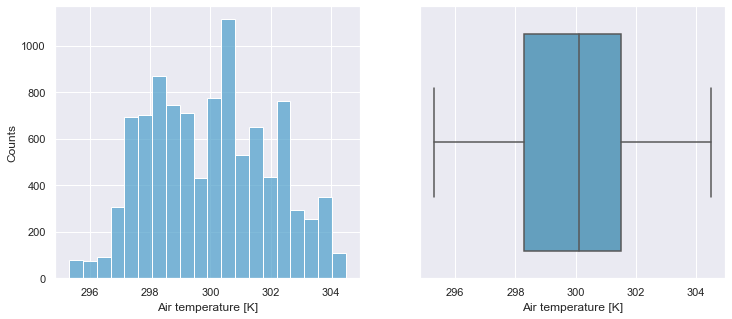

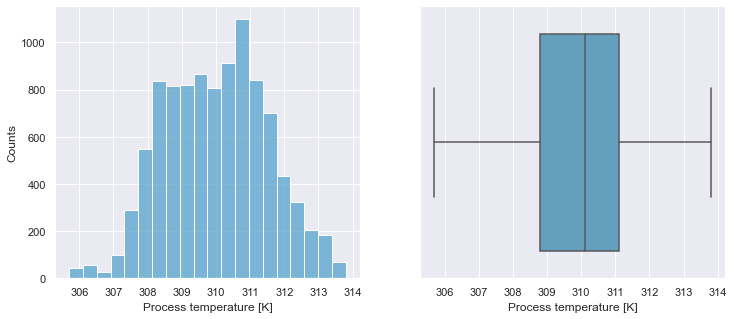

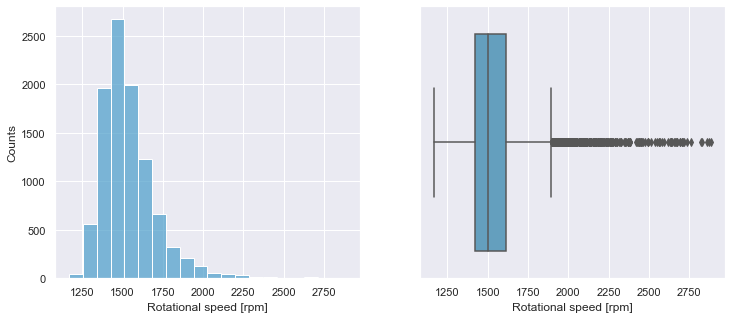

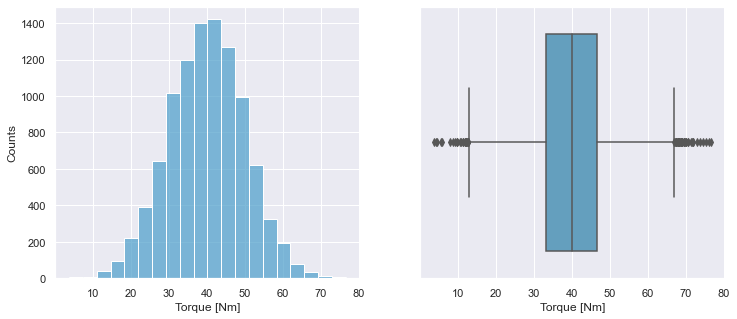

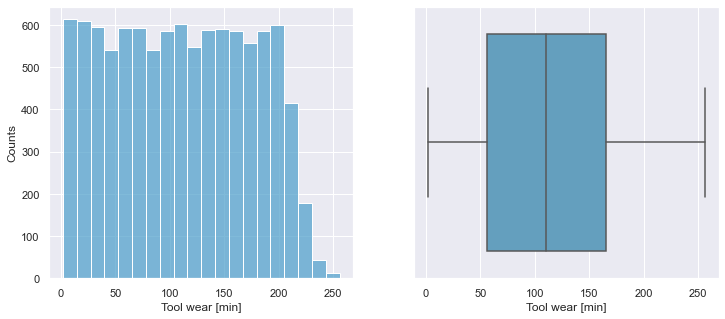

In [23]:
# Plotting scatter / histograms plots for numerical values

numerical = ['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear', 'target']

num_dict = {key: label_dict[key] for key in numerical}

for key, value in num_dict.items():
    if(key != 'target'):
        plt.figure(figsize = (12,5))
        ax = plt.subplot(1,2,1)
        sns.histplot(data[key], bins = 20)
        plt.xlabel(value)
        plt.ylabel('Counts')
        ax = plt.subplot(1,2,2)
        sns.boxplot(x = key, data = data)
        plt.xlabel(value)
        plt.show()

<Figure size 720x720 with 0 Axes>

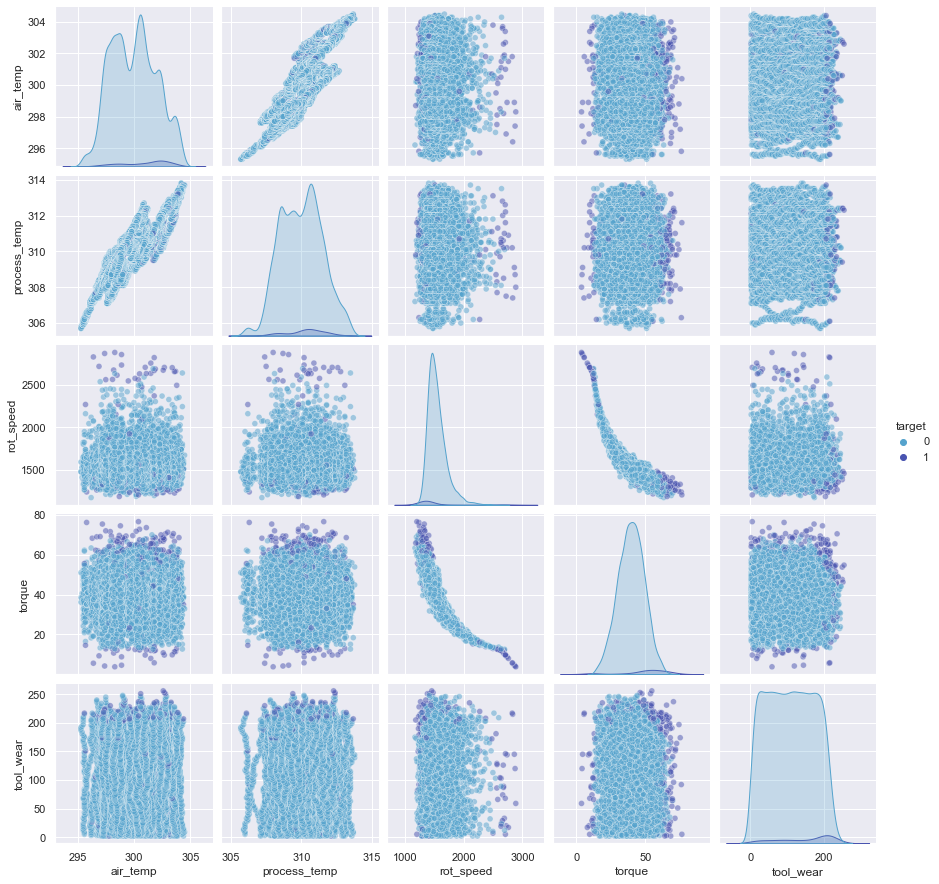

In [24]:
# Inspecting Scatter Plots looking for Patterns in Numerical Data
plt.figure(figsize = (10,10))
sns.pairplot(data[numerical], hue = 'target', plot_kws=dict(alpha=0.5))

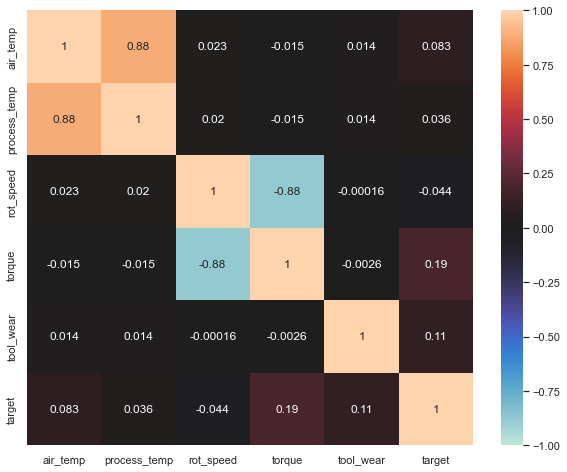

In [25]:
# Investigating cross correlation between numerical variables
data_corr = data[numerical].corr()
plt.figure(figsize = (10,8))
corrplot = sns.heatmap(data_corr, vmin = -1, vmax = 1, cmap = 'icefire', annot = True)

**Note:**

Pair plots as well as the correlation plot show two pairs of variables which are highly correlated to each other, meaning that only one of them (within a pair) may be used as a feature, the other not contributing as much to model enhancement. The variable pairs are:
 * Air Temperature and Process Temperature (process temperatures are proportional to air temperatures)
 * Rotational Speed and Torque (which indicates the machine majoritarily operates in a flat power curve, since power is torque times rotational speed) 
 
For target (failure) classification purposes, the author chooses to carry on the analysis keeping Process Temperature and Torque as features. The reason why to choose this path is twofold:
 * Physical: In engineering, torque is directly correlated to stress. Process temperature, intuitively, has higher correlation to physical stresses induced on the sample than air temperature (not taking into account the way the data table was constructed)
 * Mathematical: Process temperature distribution curve resembles better a normal distribution pattern than ambient temperature does, which is one of the assumptions for logistic regression. With Torque, the same thing, in comparison with rotational speed, which related histogram presents a large skew.

For the job of classifying failures among different categories, the other two discarded features (Air Temperature and Rotational Speed) may be used, given data transformations will be applied to make them more suitable for the algorithms.

**Note:**

The purple spots on pair plots show in which conditions the failure event happened. For chosen variables, specially Torque and Tool Wear, failures tend to happen on the extremes of values, as can be seen by the concentration of purple dots far from the middle of respective graphs.

***

## Failure Classification using Logistic Regression

**Note:**

Logistic Regression will be applied to derive a machine learning model for predicting failure using only four features:

 1. Tool Wear 
 2. Torque 
 3. Process Temperature
 
for the reasons discussed above.

**Note:**

Target classes are highly unbalanced (3.5% are labeled as failure, denoted by 1), so some sort of balancing measure is needed. First, a traditional approach will be applied, using stratification on data split, as well as class weighing during Logistic Regression fitting, and a variable threshold approach will be applied. Then, for a second path, SMOTE will be used.

**Note:**

In the context of this work (predict machine failure), I assume the most important metric is Recall, since the cost of a false negative (predicting no failure when it will happen) is of great importance for cost impacts. False positives may be thought of as the second most important issue, since deciding to stop production in favor of maintenance may as well impact costs and productivity, so F1_score will be taken into account as well. Since Recall is assumed to be the most important metric for the purposes of this work, SMOTE technique will be used as a data augmentation technique to counter class unbalance. SMOTE is recognized to favor recall over precision, enhancing the importance of false negatives over false positives.

In [26]:
# Importing relevant modules
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


In [27]:
# X and y vectors (features and target)
X = data[['torque','process_temp','tool_wear']]
y = data['target']

# Stardardiztion
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# Train and Test data split with stratification (counter class imbalance)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 74, stratify = y)

In [28]:
print(y_train.value_counts())
print(y_test.value_counts())

0    7232
1     247
Name: target, dtype: int64
0    2411
1      83
Name: target, dtype: int64


In [29]:
# Model fit
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

# Predictions
y_pred = lr.predict(X_test)

# Predicted Probabilities
y_pred_prob = lr.predict_proba(X_test)
print(y_pred_prob)

# Confusion Matrix
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_pred))

# Accuracy Score ( TP + TN / (TP + FP + TN + FN) )
print('\nAccuracy Score: ')
print(accuracy_score(y_test, y_pred))

# Recall Score ( TP / (TP + FN) )
print('\nRecall Score: ')
print(recall_score(y_test, y_pred))

# Precision Score ( TP / (TP + FP) )
print('\nPrecision Score: ')
print(precision_score(y_test, y_pred))

# F1 Score ( 2 * Precision * Recall / (Precision + Recall) )
print('\nF1 Score: ')
print(f1_score(y_test, y_pred))

[[0.31986868 0.68013132]
 [0.8730505  0.1269495 ]
 [0.77839056 0.22160944]
 ...
 [0.87104192 0.12895808]
 [0.52317014 0.47682986]
 [0.72719695 0.27280305]]
Confusion matrix: 
[[1827  584]
 [  29   54]]

Accuracy Score: 
0.7542101042502005

Recall Score: 
0.6506024096385542

Precision Score: 
0.08463949843260188

F1 Score: 
0.14979195561719832


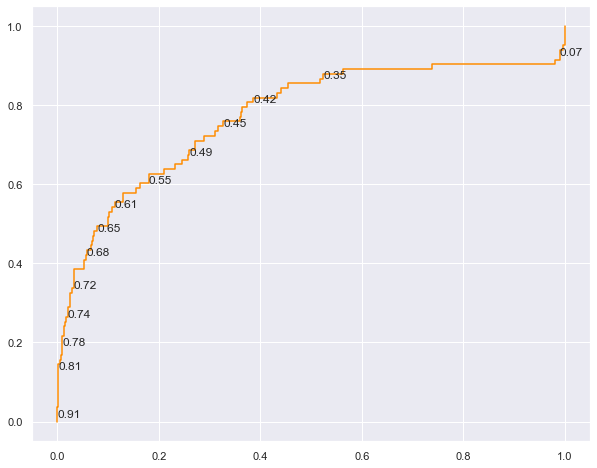

ROC AUC score: 0.7724935411492507


In [30]:
# Deriving the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob[:,1])
plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
idx = list(range(len(thresholds)))[1::10]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

**Note:**
Now SMOTE technique will be applied to balance the classes so as to improve the most important classification metrics.

In [31]:
# Importing SMOTE module from imbalance library
from imblearn.over_sampling import SMOTE

In [32]:
# Apply SMOTE to train data
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [33]:
y_resampled.value_counts()

0    7232
1    7232
Name: target, dtype: int64

In [34]:
# Fitting new Logistic Regression Model
lr_smote = LogisticRegression()
lr_smote.fit(X_resampled, y_resampled)

# Predicting outcomes
y_smote_pred = lr_smote.predict(X_test)

# Predicted Probabilities
y_smote_prob = lr.predict_proba(X_test)

# Confusion Matrix
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_smote_pred))

# Accuracy Score ( TP + TN / (TP + FP + TN + FN) )
print('\nAccuracy Score: ')
print(accuracy_score(y_test, y_smote_pred))

# Recall Score ( TP / (TP + FN) )
print('\nRecall Score: ')
print(recall_score(y_test, y_smote_pred))

# Precision Score ( TP / (TP + FP) )
print('\nPrecision Score: ')
print(precision_score(y_test, y_smote_pred))

# F1 Score ( 2 * Precision * Recall / (Precision + Recall) )
print('\nF1 Score: ')
print(f1_score(y_test, y_smote_pred))

Confusion matrix: 
[[1830  581]
 [  28   55]]

Accuracy Score: 
0.7558139534883721

Recall Score: 
0.6626506024096386

Precision Score: 
0.08647798742138364

F1 Score: 
0.15299026425591097


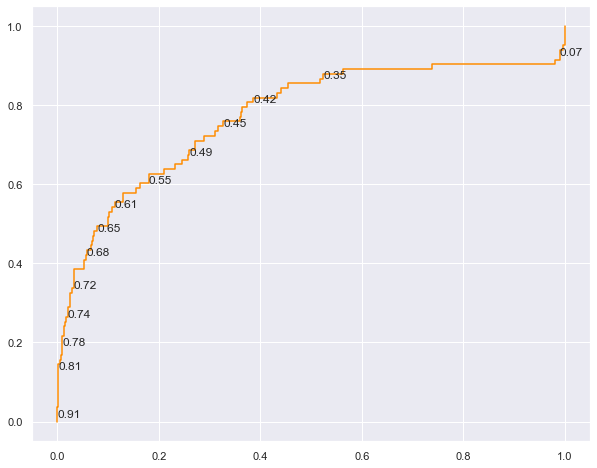

ROC AUC score: 0.7724935411492507


In [35]:
# Deriving the ROC curve
fpr, tpr, thresholds = roc_curve(y_test,y_smote_prob[:,1])
plt.figure(figsize = (10, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve')
idx = list(range(len(thresholds)))[1::10]
for i in idx:
    plt.text(fpr[i], tpr[i], thresholds[i].round(2))
plt.show()

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob[:,1])
print(f'ROC AUC score: {roc_auc}')

**Note:**
Classification metrics are very similar between applying logistic regression using either class_weight = balanced parameter or applying SMOTE techniques with prior class balance, suggesting logistic regression model have some sort of SMOTE technique embedded when appying the above mentioned parameter. Remembering that these results are for a standard classification threshold of 0.5.

[0.8918918918918919, 0.9827213822894169, 0.990280777537797, 0.9894588896697118, 0.984375, 0.9828066914498141, 0.9784081287044877, 0.9712899312575819, 0.9671079021259527]
[0.05311871227364185, 0.3166318719554627, 0.5495954450104884, 0.7344809598330725, 0.8563393484883993, 0.9270216962524654, 0.9683637125497592, 0.9836199836199836, 0.983278955954323]


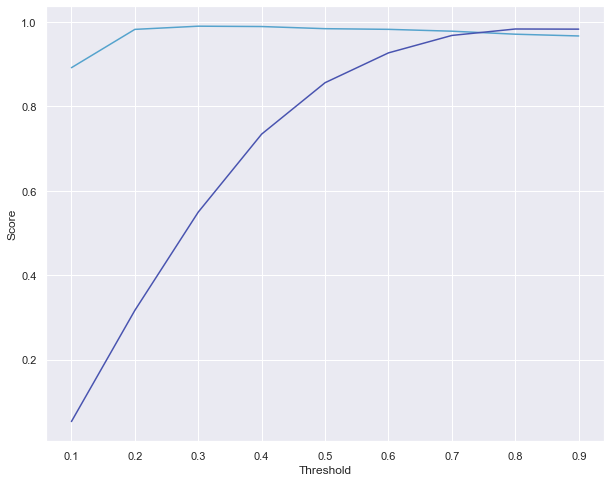

In [36]:
# Optimal threshold research
threshold_list = [i/10 for i in range(1,10)]
conf_list = []
recall_list = []
f1_score_list = []

for i in range(1,10):
    y_pred_class = (y_pred_prob[:,1] > i / 10) * 1.0
    conf_list.append(confusion_matrix(y_test, y_pred_class))

for j in conf_list:
    recall = j[0][0] / (j[0][0] + j[1][0])
    precision = j[0][0] / (j[0][0] + j[0][1])
    f1_score = 2 * recall * precision / (recall + precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)
    
print(recall_list)
print(f1_score_list)

plt.figure(figsize = (10,8))
plt.plot(threshold_list, recall_list)
plt.plot(threshold_list, f1_score_list)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.show()

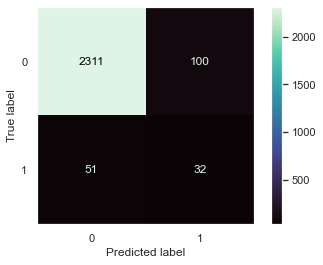

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
conf = ConfusionMatrixDisplay(conf_list[6])
conf.plot(cmap = 'mako')
plt.grid(visible = None)
plt.show()

**Note:**
As can be deduced from above analysis, choosing a threshold value of 0.70 for classification results yields both good recall and f1 scores, 0.98 and 0.97, respectively. As discussed previously, these are considered the most important metrics for predictive maintenance as judged by the author.

***

## Failure Type Discrimination applying KNN, SVM

Now we turn the attention to the problem of classifying failure types of failed articles, given the set of features of the dataset. Two different algorithms will be applied, hyperparameter tuning will be carried out and metrics comparisons between then will be made.

In [38]:
data_fail_type = data[['air_temp', 'process_temp', 'rot_speed', 'torque', 'tool_wear', 'target', 'failure_type']]

<Figure size 720x720 with 0 Axes>

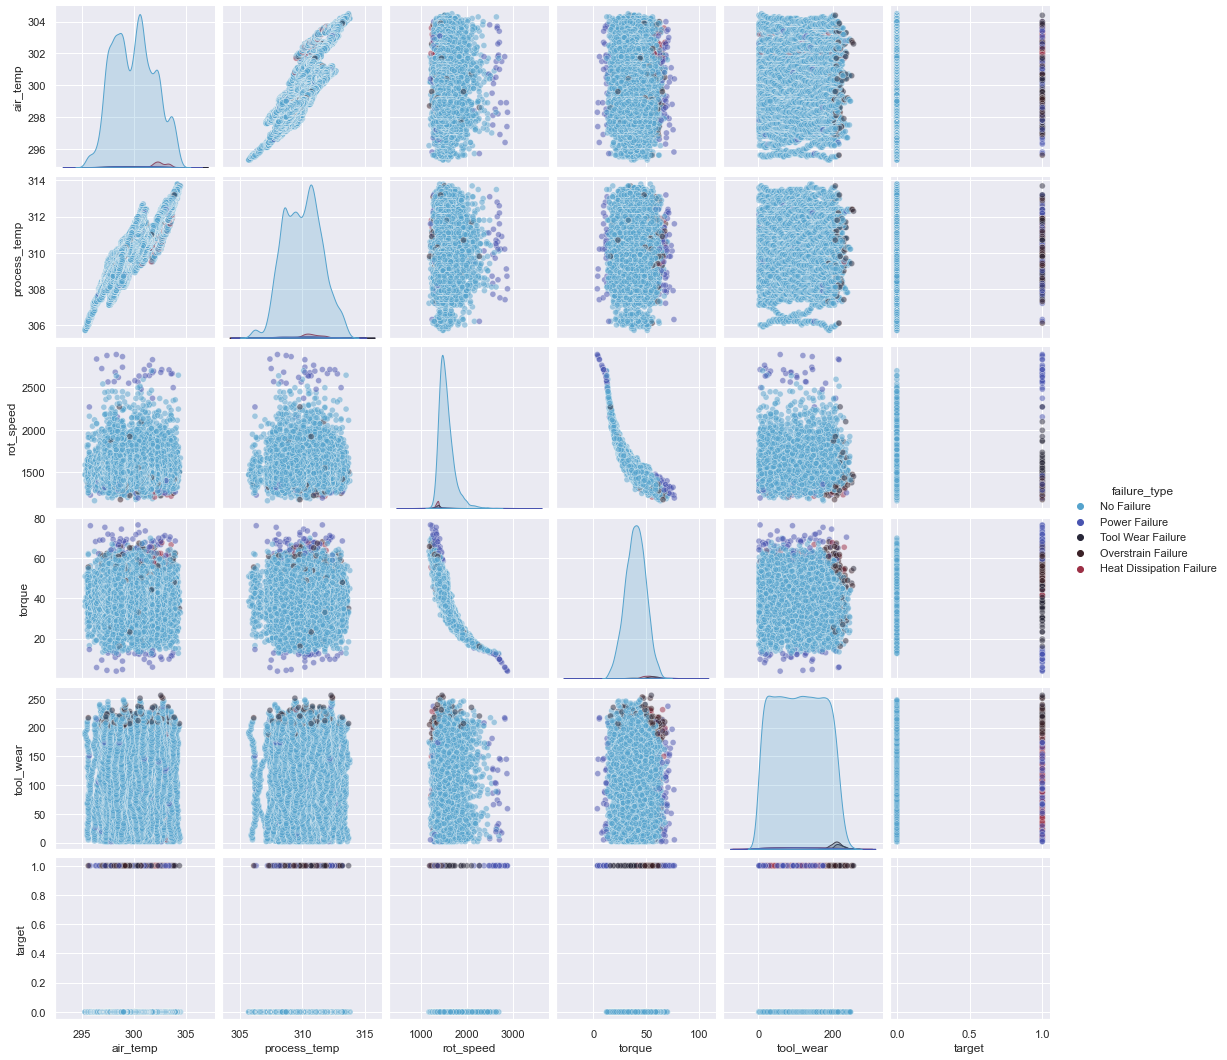

In [39]:
# Inspecting Scatter Plots looking for Patterns in Numerical Data
plt.figure(figsize = (10,10))
sns.pairplot(data_fail_type, hue = 'failure_type', plot_kws=dict(alpha=0.5))

**Note:**
Analysing pair scatter plots, we can derive some interesting conclusions:
 * Power Failures tend to occur on the extremes of Torque and Rotation Speed values. Since these values are strongly and negatively correlated, picking one of these variables may be sufficient for prediction. Another idea is to try to come up with a variable that highlights the limits of both variables combined: multiplying both variables, Torque and Rotational Speed (known as Power), yields a variable that is both phisically and mathematically appealing.
 * Tool Wear failures, as expected, tend to occur in the limit values of Tool Wear
 * Overstrain Failures seems to occur with combinations of high Tool Wear and Torque (or Power)
 * Heat Dissipation Failures appear to be spread out, but majoritarily occuring in high values of Air Temperature and high values of Torque. Phisical reasoning suggests that we can investigate these kind of failures using two derived features: one already mentioned, Power, and the other would be the difference between Process Temperature and Air Temperature, which will be called Delta Temperature. This makes sense since Heat Dissipation issues tend to occur in scenarios of high heat generation (high Power) and low cooling (low Delta Temperature)

In [40]:
# Data transformations: Selecting only failed data points / Creating new features derived from primary ones
data_fail_type = data_fail_type[data_fail_type['target'] == 1]
data_fail_type.reset_index(inplace = True)
data_fail_type['power'] = data_fail_type['torque'] * data_fail_type['rot_speed']
data_fail_type['delta_temp'] = data_fail_type['process_temp'] - data_fail_type['air_temp']
data_fail_type = data_fail_type.drop(columns = ['target'])
data_fail_type.head()

C:\Users\rafab\AppData\Local\Temp/ipykernel_13784/3666380886.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fail_type['power'] = data_fail_type['torque'] * data_fail_type['rot_speed']
C:\Users\rafab\AppData\Local\Temp/ipykernel_13784/3666380886.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fail_type['delta_temp'] = data_fail_type['process_temp'] - data_fail_type['air_temp']


,index,air_temp,process_temp,rot_speed,torque,tool_wear,failure_type,power,delta_temp
0,50,298.9,309.1,2861,4.6,145,Power Failure,13160.6,10.2
1,69,298.9,309.0,1410,65.7,193,Power Failure,92637.0,10.1
2,77,298.8,308.9,1455,41.3,210,Tool Wear Failure,60091.5,10.1
3,160,298.4,308.2,1282,60.7,218,Overstrain Failure,77817.4,9.8
4,161,298.3,308.1,1412,52.3,220,Overstrain Failure,73847.6,9.8


<Figure size 720x720 with 0 Axes>

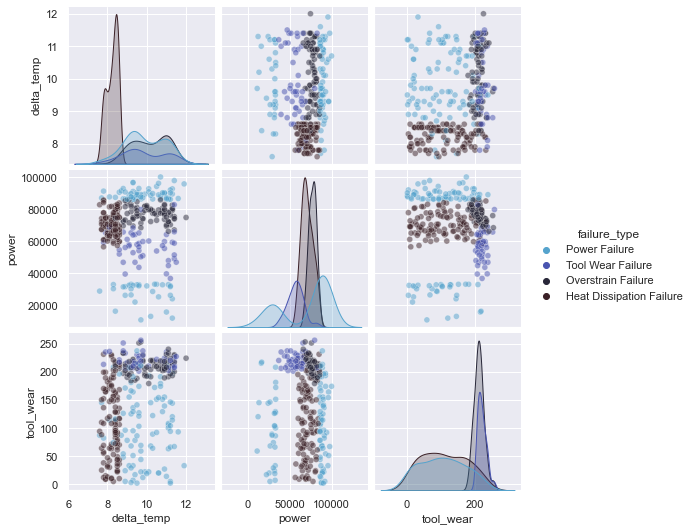

In [41]:
# Inspecting Scatter Plots looking for Patterns in Numerical Data
plt.figure(figsize = (10,10))
sns.pairplot(data_fail_type[['delta_temp', 'power', 'tool_wear', 'failure_type']], hue = 'failure_type', plot_kws=dict(alpha=0.5))

**Note:**
The above plot helps to confirm previous assumptions:
 * Heat Disspation Failures are concentrated where values for Delta Temperature are low
 * Power Failures tend to occur where Power variables are near extremes (high and low)
 * Tool Wear tend to occur when Tool Wear is high
 * Overstrain Failures tend to occur with a combination of high Tool Wear and Power

### Data Preparation for Machine Learning Algorithms

In [42]:
# Data Preparation: Selection, Split, Normalization
data_set = data_fail_type[['delta_temp','power','tool_wear','failure_type']]

In [43]:
data_set.head(5)

,delta_temp,power,tool_wear,failure_type
0,10.2,13160.6,145,Power Failure
1,10.1,92637.0,193,Power Failure
2,10.1,60091.5,210,Tool Wear Failure
3,9.8,77817.4,218,Overstrain Failure
4,9.8,73847.6,220,Overstrain Failure


In [44]:
# Removing Random Failure Samples
data_set = data_set[data_set['failure_type'] != 'Random Failures']

In [45]:
# Train-Test Split
X = data_set[['delta_temp','power','tool_wear']]
y = data_set['failure_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 74)

### Applying KNN (k-Nearest Neighbors algorithm) for Failure Type Classification

In [46]:
# Module importing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Scaling Features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

data_scaled = pd.DataFrame(X_train_scaled, columns = ['delta_temp','power','tool_wear'])
data_scaled.head()

,delta_temp,power,tool_wear
0,0.181818,0.660750,0.500000
1,0.227273,0.600771,0.653543
2,0.454545,0.245926,0.492126
3,0.318182,0.743981,0.763780
4,0.136364,0.645117,0.685039


In [48]:
data_scaled.describe()

,delta_temp,power,tool_wear
count,264.000000,264.000000,264.000000
mean,0.405733,0.655885,0.555730
std,0.267276,0.203449,0.287068
min,0.000000,0.000000,0.000000
25%,0.181818,0.594596,0.302165
50%,0.386364,0.694982,0.608268
75%,0.642045,0.792179,0.814961
max,1.000000,1.000000,1.000000


In [49]:
# Training KNN Model
knn_class = KNeighborsClassifier()
knn_class.fit(X_train_scaled, y_train)

# Predicting Outcomes
y_pred = knn_class.predict(X_test_scaled)

**Note:**
For purposes of classifying failures according their types, it seems the best metric is now accuracy, since this is a multiclass classification problem and this metric is an overall classification score regarding all failure types.

In [50]:
# Accuracy Score
print(accuracy_score(y_test, y_pred))

0.8181818181818182


In [51]:
# Failure Type wise classification scores
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.90      0.86      0.88        21
      Overstrain Failure       0.70      0.94      0.80        17
           Power Failure       1.00      0.65      0.79        20
       Tool Wear Failure       0.70      0.88      0.78         8

                accuracy                           0.82        66
               macro avg       0.82      0.83      0.81        66
            weighted avg       0.85      0.82      0.82        66



**Note:** 
From the classification report, we can see that the algorithm was very precise in classifying Power failures (100%), but precision results for Overstrain and Tool Wear failures were not so high (70%). In the following section, hyperparameter tuniing (varying k) will be carried out in order to improve the overall accuracy.

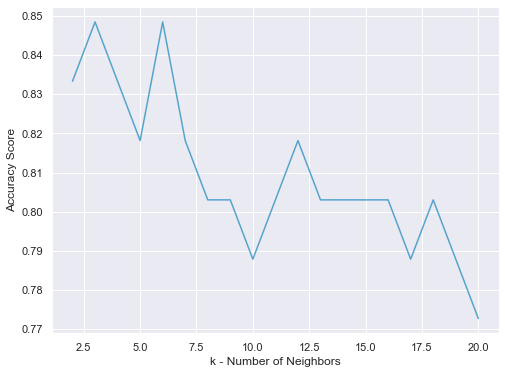

In [52]:
# Hyperparameter Tuning (varying the nuber of neighbors, k)
k_list = list(range(2,21))
accuracy_list = []
pred_list = []

for k in k_list:
    knn_class_model = KNeighborsClassifier(n_neighbors = k)
    knn_class_model.fit(X_train_scaled, y_train)
    y_pred_k = knn_class_model.predict(X_test_scaled)
    pred_list.append(y_pred_k)
    accuracy_list.append(accuracy_score(y_test, y_pred_k))

plt.figure(figsize = (8, 6))
plt.plot(k_list, accuracy_list)
plt.xlabel('k - Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.show()   

In [53]:
# Maximum accuracy reached and corresponding k
accuracy_scores = list(zip(accuracy_list , k_list))
print(max(accuracy_scores))

(0.8484848484848485, 6)


**Note:**
Maximum accuracy score is around 85% when we choose k as 6 nearest neighbors, the optimum value in this context.

In [54]:
y_pred_6 = pred_list[4]

print(classification_report(y_test, y_pred_6))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.88      1.00      0.93        21
      Overstrain Failure       0.68      0.88      0.77        17
           Power Failure       1.00      0.65      0.79        20
       Tool Wear Failure       1.00      0.88      0.93         8

                accuracy                           0.85        66
               macro avg       0.89      0.85      0.86        66
            weighted avg       0.88      0.85      0.85        66



**Note:**
Choosing k = 6, there was a shift in precision scores. Power Failures classifications remained as 1000% precise, Tool Wear classification precision raised to 100%. Heat Dissipation had a slight drop of 2% (90 to 88%), as well as Overstrain Failure (dropped from 70 to 68%).

### Applying SVM (Support Vector Machine) for Failure Type Classification

In [55]:
# Module Importing
from sklearn.svm import SVC

In [56]:
# Model fitteing and predictions using linear kernel
sv_class = SVC(kernel = 'linear')
sv_class.fit(X_train_scaled, y_train)
y_pred = sv_class.predict(X_test_scaled)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7272727272727273
                          precision    recall  f1-score   support

Heat Dissipation Failure       0.75      0.86      0.80        21
      Overstrain Failure       0.65      0.88      0.75        17
           Power Failure       1.00      0.40      0.57        20
       Tool Wear Failure       0.64      0.88      0.74         8

                accuracy                           0.73        66
               macro avg       0.76      0.75      0.71        66
            weighted avg       0.79      0.73      0.71        66



**Note:**
Overall accuracy was 72.7%, a poorer performance compared to KNN algorithm. Power Failure precision was 100%, same as using KNN, but other scores were poor. Let's see if we can improve varying hyperparameters such as kernel and regularization parameter C.

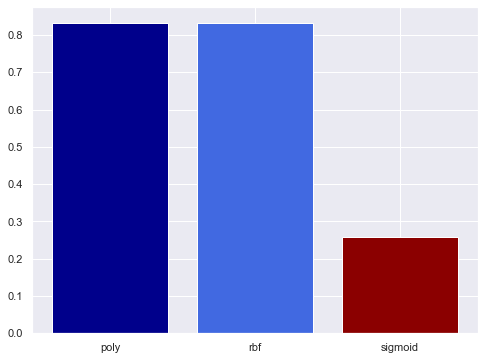

[0.8333333333333334, 0.8333333333333334, 0.25757575757575757]


In [57]:
# Investigating different kernels
kernel_list = ['poly','rbf','sigmoid']

pred_list = []
accuracy_list = []

for k in kernel_list:
    sv_class = SVC(kernel = k)
    sv_class.fit(X_train_scaled, y_train)
    y_pred_k = sv_class.predict(X_test_scaled)
    pred_list.append(y_pred_k)
    accuracy_list.append(accuracy_score(y_test, y_pred_k))
    
plt.figure(figsize = (8,6))
plt.bar(kernel_list, accuracy_list, color = ['darkblue','royalblue','darkred'])
plt.show()

print(accuracy_list)

**Note:**
Poly and RBF kernel types provided the best accuracy results, around 83% and somewhat equivalent to KNN score (85% accuracy in its best k). Sigmoid kernel clearly is not well suited for this problem.

In [58]:
# Classification Report for the Best SVM Kernel
print(classification_report(y_test, pred_list[1]))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.86      0.86      0.86        21
      Overstrain Failure       0.75      0.88      0.81        17
           Power Failure       1.00      0.75      0.86        20
       Tool Wear Failure       0.70      0.88      0.78         8

                accuracy                           0.83        66
               macro avg       0.83      0.84      0.83        66
            weighted avg       0.85      0.83      0.84        66



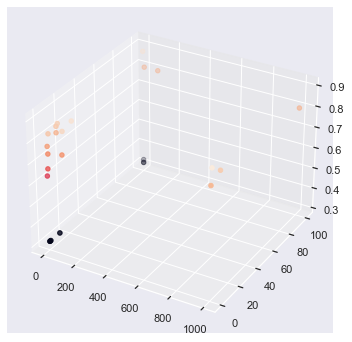

0.8939393939393939
{(0.0001, 0.1): 0.3181818181818182, (0.0001, 1): 0.3181818181818182, (0.0001, 10): 0.3181818181818182, (0.0001, 100): 0.3181818181818182, (0.01, 0.1): 0.3181818181818182, (0.01, 1): 0.3181818181818182, (0.01, 10): 0.3181818181818182, (0.01, 100): 0.3181818181818182, (0.1, 0.1): 0.3181818181818182, (0.1, 1): 0.6666666666666666, (0.1, 10): 0.803030303030303, (0.1, 100): 0.3333333333333333, (1, 0.1): 0.6363636363636364, (1, 1): 0.7727272727272727, (1, 10): 0.8333333333333334, (1, 100): 0.8787878787878788, (10, 0.1): 0.7424242424242424, (10, 1): 0.8333333333333334, (10, 10): 0.8484848484848485, (10, 100): 0.803030303030303, (100, 0.1): 0.7575757575757576, (100, 1): 0.8636363636363636, (100, 10): 0.8787878787878788, (100, 100): 0.803030303030303, (1000, 0.1): 0.8181818181818182, (1000, 1): 0.8939393939393939, (1000, 10): 0.8484848484848485, (1000, 100): 0.803030303030303}


In [59]:
# Investigating the hyperparameter C (regularization) using RBF kernel (default) and GridSearchCV
from sklearn.model_selection import GridSearchCV

C_list = [0.0001, 0.01, 0.1, 1, 10, 100, 1000]
gamma_list = [0.1, 1, 10, 100]
pred_dict = {}
accuracy_dict = {}

for c in C_list:
    for gamma in gamma_list:
        sv_class = SVC(C = c, gamma = gamma)
        sv_class.fit(X_train_scaled, y_train)
        y_pred = sv_class.predict(X_test_scaled)
        pred_dict[(c, gamma)] = y_pred
        accuracy_dict[(c, gamma)] = accuracy_score(y_test, y_pred)
        
x, y = zip(*accuracy_dict.keys())

z = list(accuracy_dict.values())

fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(projection = '3d')
ax.scatter(x, y, z, c = z)
plt.show()

print(max(accuracy_dict.values()))
print(accuracy_dict)

**Note:**
By regularizing the model varying hyperparameters C and gamma, it was possible to get a 89% accuracy for C = 1000 and gamma = 1.

In [60]:
# Individual category scores for the optimal hyperparameter combination
print(classification_report(y_test, pred_dict[(1000, 1)]))

                          precision    recall  f1-score   support

Heat Dissipation Failure       0.89      0.81      0.85        21
      Overstrain Failure       1.00      0.88      0.94        17
           Power Failure       0.95      0.95      0.95        20
       Tool Wear Failure       0.67      1.00      0.80         8

                accuracy                           0.89        66
               macro avg       0.88      0.91      0.88        66
            weighted avg       0.91      0.89      0.90        66



## Conclusions

As stated in the introduction, the objective of this study was to analyze data on predictive maintenance and come up with machine learning models capable of performing two different but complementary tasks:
 1. Given a dataset with availables features, predict whether or not there will be a failure in the evaluated machining process and;
 2. If a failure is predicted, which kind of failure, among the most known ones, is the most probable to happen.

The following steps were carried out during data analysis and model building:
 1. Initial data inspection, pre-processing, cleaning and basic statistics;
 2. Exploratory data analysis, identification of strongest prediction features, understanding of the physical problem and correlations;
 3. Data preparation for model input (Logistic Regression for failure classification), target data balance, basic model fit, initial predictions and scores
 4. Threshold value tuning for optmizing recall and f1 scores (considered the most important in the present context)
 5. With failure type classification in mind, data preparation (normalization) for input to two classification machine learning algorithms (KNN and SVM)
 6. Training, predicting and hyperparameter tuning for KNN algorithm
 7. Training, predicting and hyperparameter tuning for SVM algorithm
 
Summary of most important performance metrics achieved:
 1. Baseline Logistic Classification (threshold = 0.5): Recall = 66% / F1 = 15%
 2. Tuned Logistic Classification (threshold = 0.7): Recall = 98% / F1 = 97%
 3. Baseline KNN Classification (k = 5): Accuracy = 82%
 4. Tuned KNN Classification (k = 6): Accuracy = 85%
 5. Baseline SVM Classification ( kernel = 'linear', C, gamma = defaults): Accuracy = 72%
 6. Tuned SVM Classification ( kernel = 'rbf', C = 1000, gamma = 1): Accuracy = 89%